This file provides a few basic examples of Neet usage.

First let's load an example network.  There are a number of example networks in `neet.boolean.examples`.  The `s_pombe` network represents the interactions among 9 components that define the cell cycle of *S. pombe* (fission yeast).

In [1]:
import sys
sys.path.insert(0, "../")

In [3]:
sys.path

['../',
 '/Users/Harrison/Desktop/ASU/Neet/examples',
 '/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python37.zip',
 '/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7',
 '/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload',
 '',
 '/Users/Harrison/Library/Python/3.7/lib/python/site-packages',
 '/Users/Harrison/Desktop/ASU/ecg',
 '/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages',
 '/Users/Harrison/Library/Python/3.7/lib/python/site-packages/IPython/extensions',
 '/Users/Harrison/.ipython']

In [21]:
%matplotlib inline

In [4]:
from neet.boolean.examples import s_pombe

In [5]:
s_pombe.size

9

The most fundamental aspect of a Neet network is the `update` function, which defines the network's dynamics.  The `update` function takes a network state at timestep `t` and outputs the resulting state at `t+1`:

In [6]:
s_pombe.update([0,0,0,0,0,0,0,0,0])

[0, 1, 0, 0, 0, 0, 0, 0, 0]

The "informational architecture" of a Neet network encapsulates computation of quantities such as active information, entropy rate, transfer entropy, and mutual information.

In [7]:
from neet.information import Architecture

In [8]:
k = 2 # the history length, the size of each sample in information calculations
timesteps = 5 # the number of timesteps taken from all possible starting points to create samples
arch = Architecture(s_pombe, k, timesteps)

In [9]:
# the active information for each node
arch.active_information()

array([0.        , 0.06634219, 0.32303261, 0.32303261, 0.07918928,
       0.11236749, 0.24586519, 0.24586519, 0.02025117])

In [10]:
# the mutual information between a pair of nodes
node1index,node2index = 3,5
arch.mutual_information()[node1index,node2index]

0.009288397587760126

The average sensitivity measures the degree to which single bit flips lead to changes that spread through the system.

In [13]:
s_pombe.average_sensitivity()

0.9513888888888888

Neet can tell you which edges in the network are canalizing.

In [14]:
s_pombe.canalizing_edges()

{(0, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (4, 5),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 6),
 (5, 7),
 (8, 4)}

If `networkx` and `pygraphviz` are installed, the `draw` function outputs an image representing the causal structure of the network.

In [15]:
s_pombe.names

['SK',
 'Cdc2_Cdc13',
 'Ste9',
 'Rum1',
 'Slp1',
 'Cdc2_Cdc13_active',
 'Wee1_Mik1',
 'Cdc25',
 'PP']

Draw network using `networkx`

In [19]:
import networkx as nx

In [17]:
s_pombe_nx = s_pombe.to_networkx_graph(labels="names")

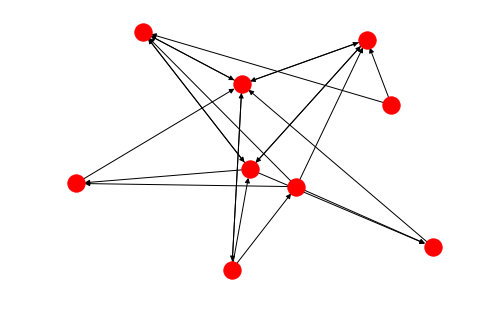

In [22]:
nx.draw(s_pombe_nx)

Or for a nicer looking graph (if you have `pygraphviz` installed)

In [23]:
s_pombe.draw(graphkwargs={'labels':'names'})

ModuleNotFoundError: No module named 'pygraphviz'

An image of the attractor landscape can similarly be generated.

In [12]:
from neet.synchronous import Landscape

In [13]:
landscape = Landscape(s_pombe)

In [14]:
landscape.draw()